In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
!pip install quandl
import quandl

In [10]:
data = quandl.get("NSE/TATAGLOBAL")
data.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56
2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31
2010-07-26,120.1,121.00,117.10,117.10,117.60,658440.0,780.01
2010-07-27,117.6,119.50,112.00,118.80,118.65,586100.0,694.98


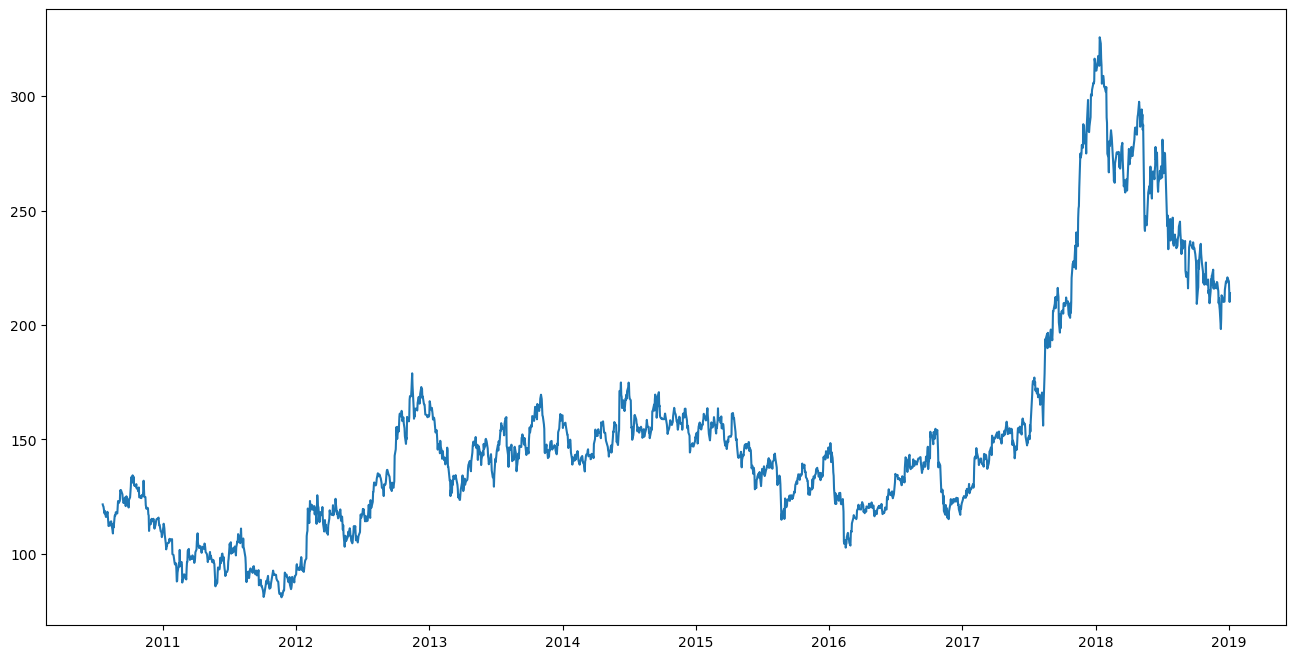

In [11]:
plt.figure(figsize=(16,8))
plt.plot(data['Close'], label='Closing Price')

In [12]:
data['Open - Close']=data['Open'] - data['Close']
data['High - Low']= data['High'] - data['Low']
data=data.dropna()
X= data[['Open - Close','High - Low']]
X.head()

,Open - Close,High - Low
Date,,
2010-07-21,0.55,1.95
2010-07-22,-0.60,1.75
2010-07-23,1.15,1.70
2010-07-26,2.50,3.90
2010-07-27,-1.05,7.50


In [13]:
Y= np.where(data['Close'].shift(-1)>data['Close'],1,-1)
Y

array([-1, -1, -1, ..., -1,  1, -1])

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state = 44)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn=neighbors.KNeighborsClassifier()
model=GridSearchCV(knn, params, cv=5)

#fit the model
model.fit(X_train, y_train)

#accuracy score
accuracy_train=accuracy_score(y_train, model.predict(X_train))
accuracy_test=accuracy_score(y_test, model.predict(X_test))

print('Train data Accuracy: %.2f' %accuracy_train)
print('Test data Accuracy: %.2f' %accuracy_test)

Train data Accuracy: 0.67
Test data Accuracy: 0.51


In [29]:
y = data['Close']
y

Date
2010-07-21    121.55
2010-07-22    120.90
2010-07-23    120.65
2010-07-26    117.60
2010-07-27    118.65
               ...  
2018-12-31    219.40
2019-01-01    219.10
2019-01-02    214.60
2019-01-03    210.05
2019-01-04    213.80
Name: Close, Length: 2100, dtype: float64

In [30]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.25, random_state= 44)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn_reg=neighbors.KNeighborsRegressor()
model_reg=GridSearchCV(knn_reg, params, cv=5)

#fit the model
model_reg.fit(X_train_reg, y_train_reg)

predictions=model_reg.predict(X_test_reg)
print(predictions)

[111.27       142.19       138.59666667 150.4        186.53
 135.12333333 151.13666667 141.71333333 118.66333333 144.59333333
 160.44333333 140.72       156.5        207.73666667 132.97
 207.62       111.35333333 134.16       132.28666667 138.60666667
 161.86666667 131.26       121.99333333 135.12333333 164.45666667
 216.39       135.43666667 137.07       162.64       128.51
 141.51333333 129.99666667 152.64666667 134.33333333 196.32333333
 120.84333333 156.49333333 157.4        145.47       132.08333333
 122.75666667 128.77       129.45333333 159.17666667 167.54666667
 168.98       189.31333333 184.33       187.08333333 130.23666667
 141.33333333 136.24       130.08       162.26333333 152.51333333
 124.14       134.20333333 139.87666667 113.61666667 137.07
 136.69       120.16666667 205.71333333 122.48333333 141.50666667
 136.37666667 114.93       132.82666667 181.68       127.91333333
 136.37666667 211.39333333 174.05333333 162.33333333 131.89666667
 131.15666667 124.06       134.61 

In [31]:
valid = pd.DataFrame({'Actual Close':y_test_reg, 'Predicted Close value':predictions})
valid.head()

,Actual Close,Predicted Close value
Date,,
2015-03-17,156.70,111.270000
2015-09-07,120.45,142.190000
2013-02-18,141.90,138.596667
2013-07-05,145.15,150.400000
2018-03-15,279.60,186.530000
